This notebook analyzes the results of the global comparison of the models. 

In [3]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('./models/')
from useful_functions import df_to_dict, concat_dico, get_classement, sort_list


In [4]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']


In [5]:
def classify_bis(point, r_effs): # with my nose 

    if r_effs[point] < 0.5:
        return 'big decrease'
    elif r_effs[point] < 0.8:
        return 'decrease'
    elif r_effs[point] < 1.2:
        return 'stable'
    elif r_effs[point] < 3:
        return 'increase'
    else:
        return 'big increase'

In [8]:
dicocolor={'big decrease':'green', 'decrease':'lightgreen', 'stable':'yellow', 'increase':'orange', 'big increase':'red', 'inflexion':'blue', 'not classified' : 'black'}
colors_models={'ARIMA':'blue', 'Exponential':'red', 'Moving Average':'green', 'SIRH1':'yellow', 'SIRH2':'orange', 'SIRH3':'purple', 'SIRH4':'pink', 'Linear Regression':'brown', 'Bayesian Regression':'black', 'VAR':'blue', 'Exponential Multi':'red', 'Moving Average Multi':'green', 'SIRH Multi1':'yellow', 'SIRH Multi2':'orange'}

In [6]:


def plot_pandemic(reach = 7 , mob = 0 , pand = 0 , type_of_model= '1D', loss='RMSE') : 

    df=pd.read_csv('./all_pandemics/pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized= np.array(df.loc[0])
    plt.plot(n_hospitalized)


    results=pd.read_csv('./results/global_evaluation_from_zero_corrected/evaluation_with_'+loss+'_of_'+type_of_model+'_models_on_pandemic_'+str(mob)+str('_')+str(pand)+'_and_reach_='+str(reach)+'.csv')
    results.drop(['Unnamed: 0'], axis=1, inplace=True)
    if type_of_model == '3D':
        models_names=models3Dnames
    elif type_of_model == '1D':
        models_names=models1Dnames
    results.index=models_names
    predictions=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    predictions.drop(['Unnamed: 0'], axis=1, inplace=True)
    predictions.index=[20 * i for i in range(1, 15)]
    label_dones=[]
    for point in results.columns :
        best_model=models_names[np.argmin(results[point])]
        id=int(point.split('[')[1].split(']')[0])
        if best_model not in label_dones : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model],  label=best_model)
            label_dones.append(best_model)
        else : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model])

    plt.title('Best '+type_of_model+' models according to '+loss+' and their predictions on pandemic ' + str(mob) + ' ' + str(pand))  
    plt.xlabel('Days')
    plt.ylabel('Number of hospitalized')
    plt.legend()
    plt.show()



In [7]:
# concatenate two df who have the same columns : 
def concat_df(df1, df2):
    if not df1.columns.equals(df2.columns):
        raise ValueError("Les deux DataFrames doivent avoir les mêmes colonnes."+str(df1.columns)+str(df2.columns))
    
    return pd.concat([df1, df2], axis=0)

Examples of some pandemics with the points classified : 

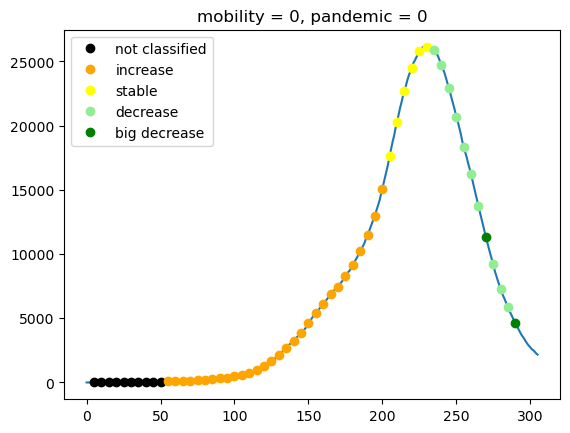

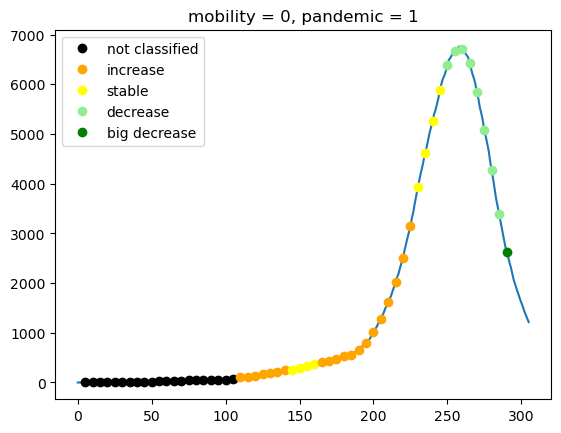

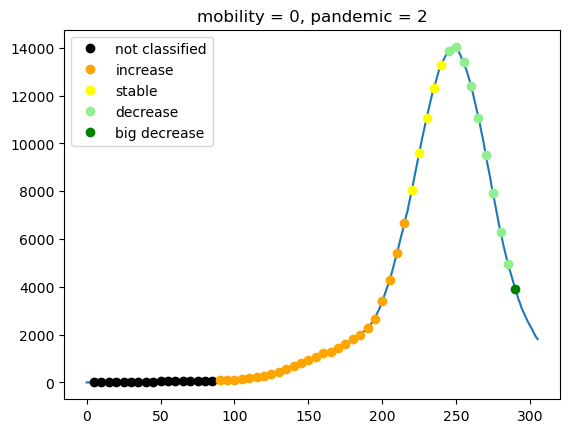

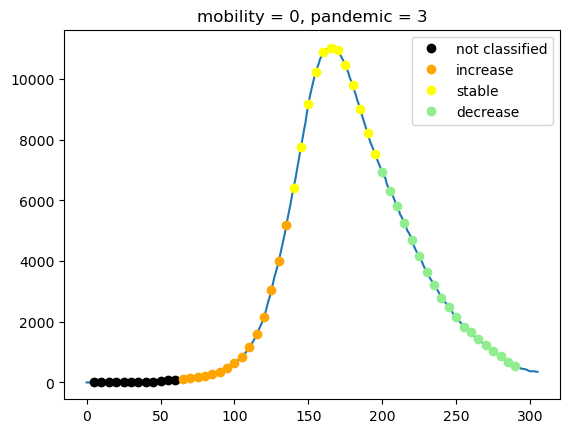

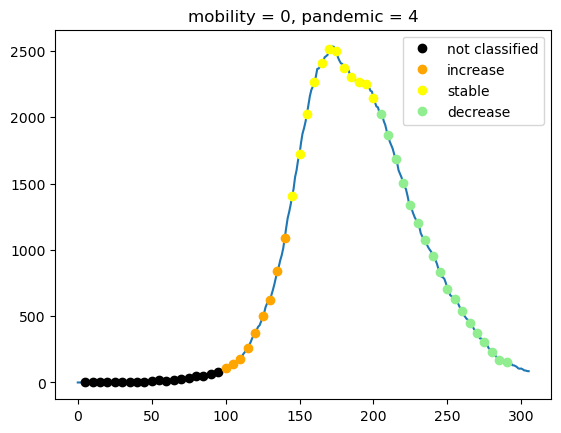

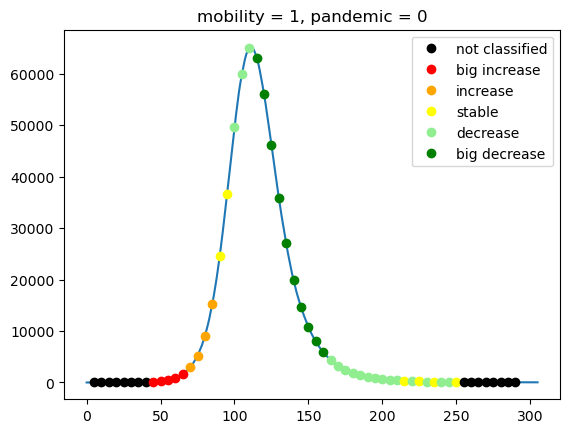

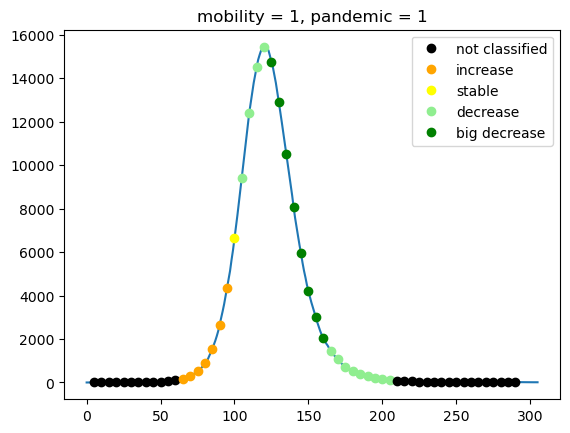

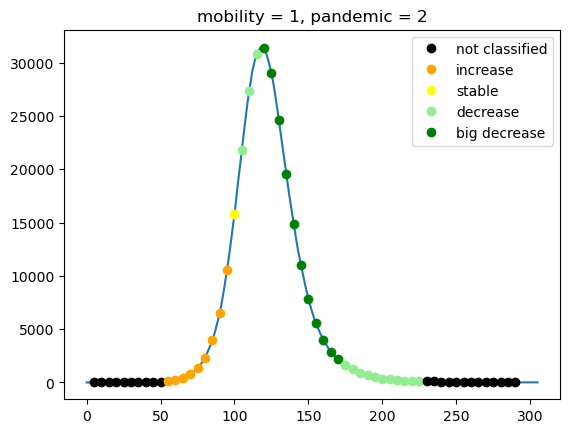

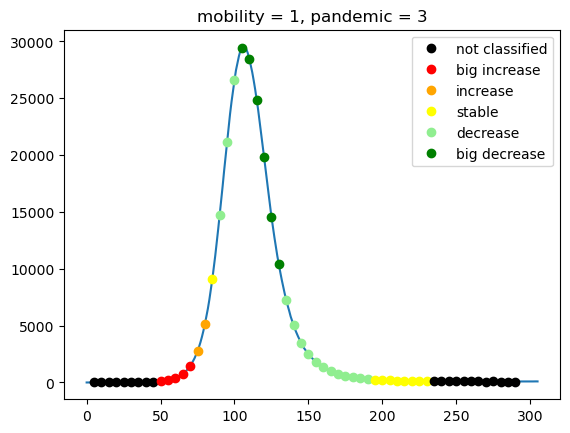

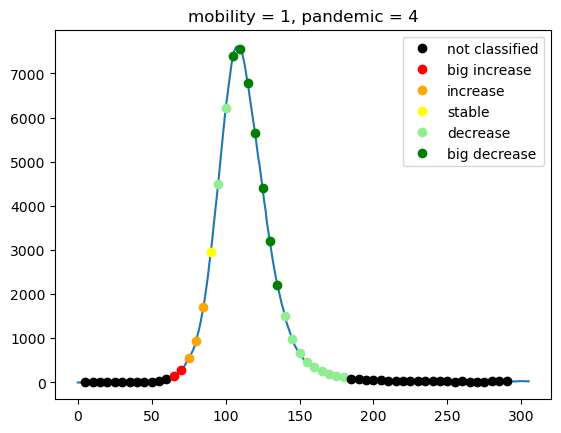

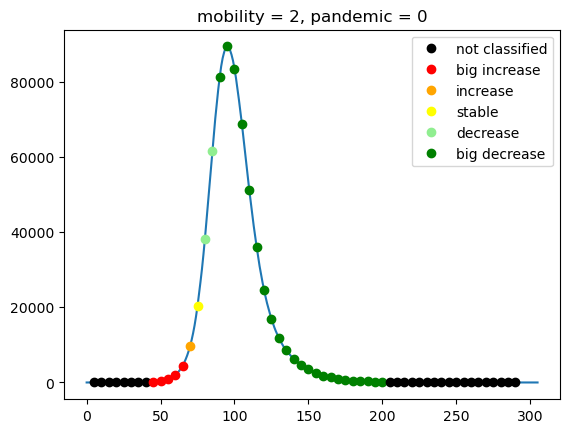

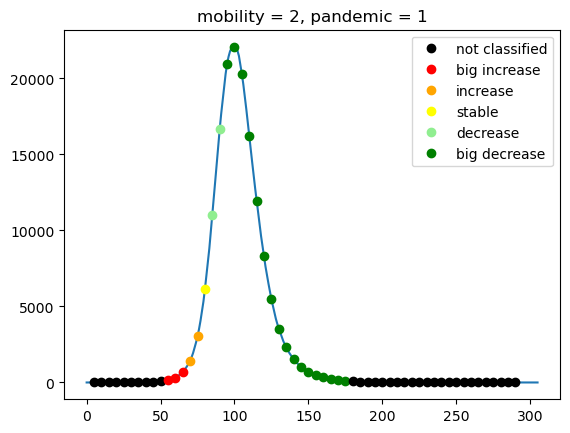

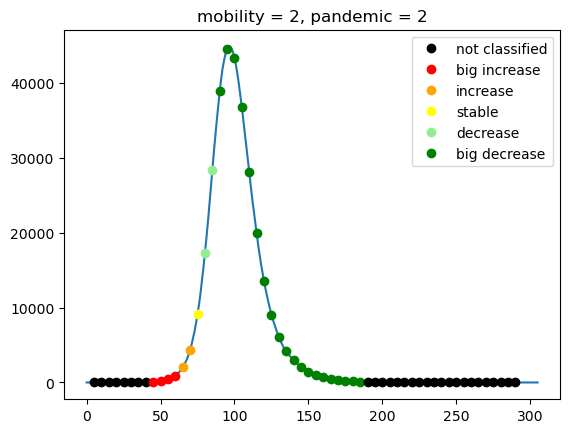

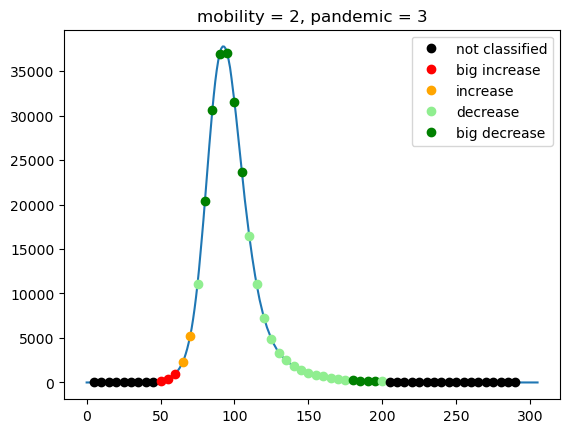

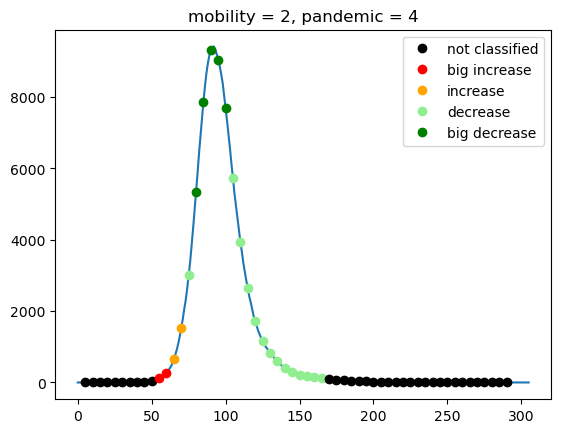

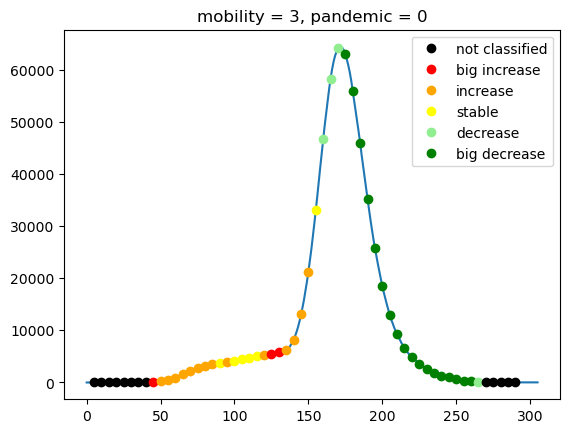

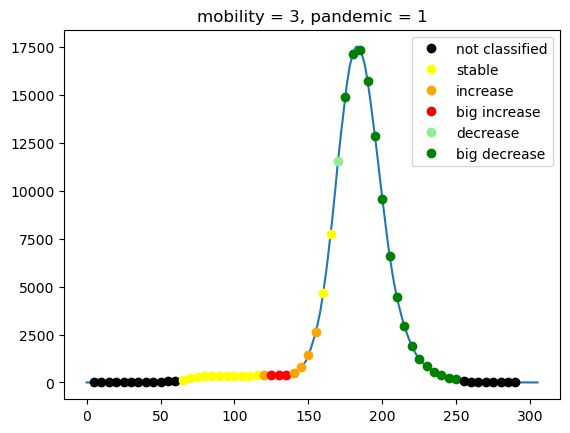

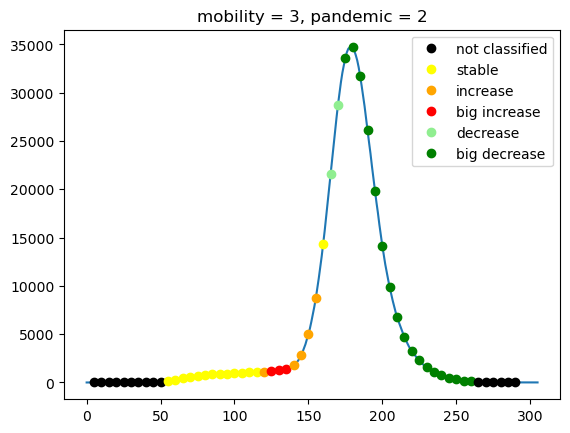

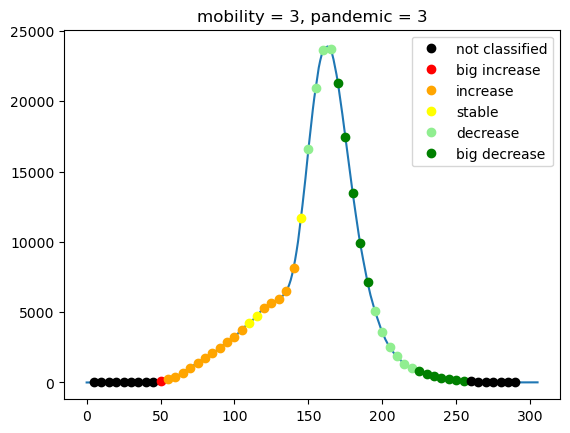

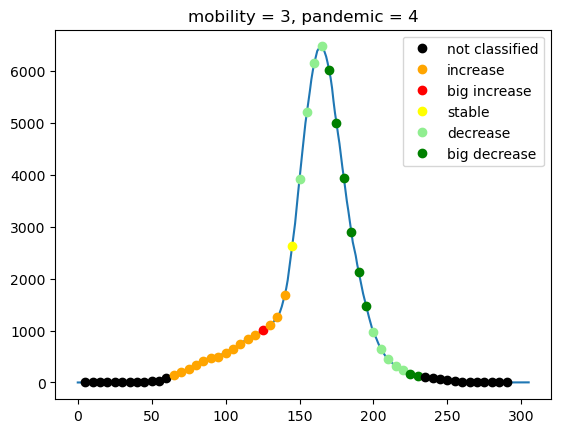

stable = 180
decrease = 248
increase = 284
big decrease = 275
big increase = 173
inflexion = 0


In [9]:
xs=[5*i for i in range(1, 59)]

countstable=0
countdecrease=0
countincrease=0
countbigdecrease=0
countbigincrease=0
countinflexion=0

for mob in range(4): 
    for pand in range(5): 
        label_seen = {}

        df= pd.read_csv('./all_pandemics/pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        r_eff=np.array(df.loc['r_eff'])
        plt.plot(n_hospitalized)
        for x in xs : 
            # if classify(x, n_hospitalized) == 'stable' : 
            if classify_bis(x, r_eff) == 'stable' :
                countstable+=1
            # if classify(x, n_hospitalized) == 'decrease' : 
            if classify_bis(x, r_eff) == 'decrease' :
                countdecrease+=1
            # if classify(x, n_hospitalized) == 'increase' :
            if classify_bis(x, r_eff) == 'increase' : 
                countincrease+=1
            # if classify(x, n_hospitalized) == 'big decrease' : 
            if classify_bis(x, r_eff) == 'big decrease' :
                countbigdecrease+=1
            # if classify(x, n_hospitalized) == 'big increase' : 
            if classify_bis(x, r_eff) == 'big increase' :
                countbigincrease+=1
            # if classify(x, n_hospitalized) == 'inflexion' : 
            if classify_bis(x, r_eff) == 'inflexion' :
                countinflexion+=1
            # label = classify(x, n_hospitalized)
            if n_hospitalized[x]<100 : 
                label = 'not classified'
            else : 
                label = classify_bis(x, r_eff)

            if label not in label_seen:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label], label=label)
                label_seen[label] = True
            else:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label])
        plt.title('mobility = '+str(mob)+', pandemic = '+str(pand))
        plt.legend()
        plt.show()

    
print('stable = ' +str(countstable))
print('decrease = ' +str(countdecrease))
print('increase = ' +str(countincrease))
print('big decrease = ' +str(countbigdecrease))
print('big increase = ' +str(countbigincrease))
print('inflexion = ' +str(countinflexion))


Plots of  the models with the different type of points. 

On a plot, one readq the performance of a model for a loss and a reach on all the type of points. 

These graphes are useful when one wants to know on which type of point does a model performs the best. 

In [ ]:

model_type='1D'
loss='RMSE'
reach='7'
type_of_points=['all','big increase', 'increase' , 'stable', 'decrease', 'big decrease']

for model_type in ['1D', '3D']:
    for loss in ['RMSE', 'WIS'] : 
        for reach in ['7', '14'] : 
            all_figs=[]
            all_axes=[]
            for i in range(len(models1Dnames)+len(models3Dnames)):
                fig, axs = plt.subplots(6, figsize=(8, 12)) 
                all_figs.append(fig)
                all_axes.append(axs)
            for index_label, label_point in enumerate( type_of_points):
                all_results=[]

                list_of_models= models1Dnames+models3Dnames
                all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
                results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models

                for name in results_list :
                    mob=int(name.split('_')[-5])
                    pand=int(name.split('_')[-4])
                    dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                    dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                    dicoresults=concat_dico(dicoresults1, dicoresults2)
                    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                    df.drop(['Unnamed: 0'], axis=1, inplace=True)
                    n_hospitalized = np.array(df.loc['n_hospitalized'])
                    r_eff=np.array(df.loc['r_eff'])
                    indexs_points=[[20*i] for i in range(1, 15) ] 
                    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                    prediction.index=[20*i for i in range(1, 15)]
                    prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                    prediction_all=prediction
                    prediction=prediction_bis
                    for point in indexs_points: 
                        if label_point=='all': 
                            real_value=prediction_all['Real values'].loc[point[0]]
                            perfs=dicoresults[str(point)]
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        elif classify_bis(point[0], r_eff) == label_point :
                            real_value=prediction_all['Real values'].loc[point[0]]
                            perfs=dicoresults[str(point)]
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
                            


                expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( 14)])) for i in range(len(rankings))] 


                    



                for i in range(len(models1Dnames)+len(models3Dnames)):   
                    all_results.append(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))
                    
                    all_axes[i][index_label].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                    tick=min(round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) , round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1)) 
                    all_axes[i][index_label].set_yticks([ tick])
                    all_axes[i][index_label].set_ylim(bottom = 0 , top = max(tick , (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])) )))*1.2)
                    all_axes[i][index_label].set_ylabel(label_point, labelpad=30)
                    all_axes[i][index_label].yaxis.label.set_rotation(45)
                    if index_label != len(type_of_points)-1:
                        all_axes[i][index_label].set_xticks([])
                    else : 
                        all_axes[i][index_label].set_xticks([j for j in range(len(rankings))])
                        all_axes[i][index_label].set_xlabel('Rank'  )
                    all_figs[i].suptitle('Distribution of the ranks of '+list_of_models[i]+' for different type of points  for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
            for fig in all_figs:
                plt.close(fig)



Distribution of ranking / model for all types of points. 

On a graph, we plot the distribution of ranking of all models for a specific type of point (a graph = a type of point)

In [ ]:
model_type='1D'
loss='RMSE'
reach='7'
list_of_models= models1Dnames+models3Dnames
list_of_models.remove('Moving Average Multi')
type_of_points=['all','big increase', 'increase' , 'stable',  'decrease', 'big decrease']

for loss in ['RMSE', 'WIS']: 
    for reach in ['7', '14']:
        df_expected_ranks=pd.DataFrame(columns= list_of_models, index = type_of_points )



        for label_point in type_of_points:

            all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
            results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
            for name in results_list :
                mob=int(name.split('_')[-5])
                pand=int(name.split('_')[-4])
                dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                dicoresults=concat_dico(dicoresults1, dicoresults2)
                df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                df.drop(['Unnamed: 0'], axis=1, inplace=True)
                n_hospitalized = np.array(df.loc['n_hospitalized'])
                r_eff=np.array(df.loc['r_eff'])
                indexs_points=[[20*i] for i in range(1, 15) ] 
                prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                prediction.index=[20*i for i in range(1, 15)]
                prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                prediction_all=prediction
                prediction=prediction_bis
                for point in indexs_points: 
                    if n_hospitalized[point[0]] >= 100 :
                        if label_point=='all': 
                            real_value=prediction_all['Real values'].loc[point[0]]
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        elif classify_bis(point[0], r_eff) == label_point :
                            real_value=prediction_all['Real values'].loc[point[0]]
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
                        


            fig, axs = plt.subplots(len(list_of_models), figsize=(8, 12))     
            expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]   
             
            for i in range(len(rankings)):   
                axs[i].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                axs[i].set_yticks([ round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
                axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                axs[i].set_ylabel(list_of_models[i], labelpad=30)
                axs[i].yaxis.label.set_rotation(45)
                if i != len(rankings)-1:
                    axs[i].set_xticks([])
                else : 
                    axs[i].set_xticks([j for j in range(len(rankings))])
                    axs[i].set_xlabel('Rank'  )
                fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')

            plt.show()
            plt.figure(figsize=(10, 6))
            exp_copy=expected_ranks.copy()
            expected_ranks.sort()
            df_expected_ranks.loc[label_point]=exp_copy
            plt.bar(sort_list(list_of_models, exp_copy), expected_ranks, edgecolor='black')
            plt.xticks(rotation=90)
            plt.title('Expected rank of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
        
        plt.figure(figsize=(9,6))
        sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm', annot=True, fmt=".1f", vmin=1, vmax=12)
        xticks = list_of_models
        yticks = type_of_points
        plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
        plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks, rotation=0)
        plt.title('Expected rank of the models for the different types of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
        plt.show()

Ensemble model only possible for RMSE

R2 :  0.9783409240704376
Coefficients :  [ 5.31349969e-01 -1.63836788e-01  2.93595693e-02  9.93915657e-02
  1.00518620e-01  5.97886025e-02  1.60506650e-06  4.88431809e-02
  2.36130066e-01  9.47142010e-03 -1.68899747e-03]
Intercept :  117.9496829740524


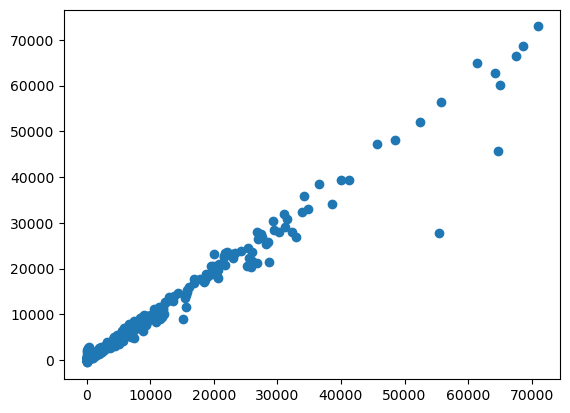

0.9493288127944576


In [22]:
concatenated_train_7=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name ])
concatenated_test_7=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name])
names_7 = [name for name in os.listdir('./results/predictions_of_the_models_corrected/') if '7_days' in name]
names_train_7=[]
names_test_7=[]
np.random.seed(0)
for name in names_7 : 

    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/'+name)
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.drop(['Exponential'], axis=1, inplace=True)
    prediction.drop(['Exponential Multi'], axis=1, inplace=True)
    prediction.drop(['Moving Average Multi'], axis=1, inplace=True)
    
    prediction.index=[20 * i for i in range(1, 15)]



    if np.random.rand() < 0.8 : 
        names_train_7.append(name)
        concatenated_train_7=concat_df(concatenated_train_7, prediction)
    else :
        names_test_7.append(name)
        concatenated_test_7=concat_df(concatenated_test_7, prediction)
matrix_train_7=np.array(concatenated_train_7)
matrix_test_7=np.array(concatenated_test_7)


# importing linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# rl : 
X_train_7=matrix_train_7[:,:-1]
y_train_7=matrix_train_7[:,-1]
X_test_7=matrix_test_7[:,:-1]
y_test_7=matrix_test_7[:,-1]
regressor_7_days=LinearRegression()
regressor_7_days.fit(X_train_7, y_train_7)
y_pred_7=regressor_7_days.predict(X_test_7)
print('R2 : ', r2_score(y_test_7, y_pred_7))
print('Coefficients : ', regressor_7_days.coef_)
print('Intercept : ', regressor_7_days.intercept_)
plt.plot(y_test_7, y_pred_7, 'o')
plt.show()
print(np.sum(regressor_7_days.coef_))
coefs_7_days=regressor_7_days.coef_
intercept_7_days=regressor_7_days.intercept_

R2 :  0.6692832769873408
Coefficients :  [ 4.75533451e-01 -2.18834628e-01  6.45232754e-02  1.32491709e-01
  2.82479251e-01 -4.87890842e-02  1.48566159e-11  4.88184409e-03
  2.12360847e-01  2.31516261e-02 -2.86834341e-03]
Intercept :  270.5161276100066


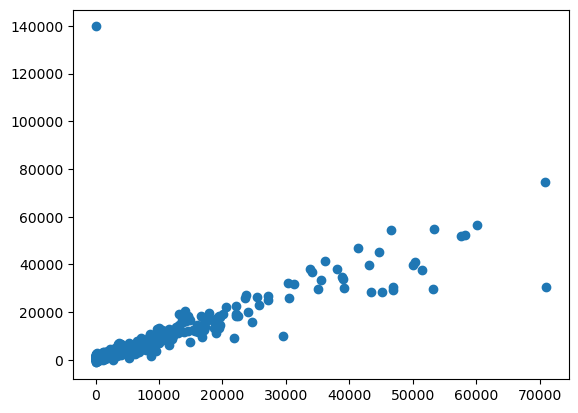

0.9249299482282881


In [21]:
# idem for 14 : 
concatenated_train_14=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name ])
concatenated_test_14=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name ])
names_14 = [name for name in os.listdir('./results/predictions_of_the_models_corrected/') if '14_days' in name]
names_train_14=[]
names_test_14=[]
np.random.seed(0)

for name in names_14 : 

    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/'+name)
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.drop(['Exponential'], axis=1, inplace=True)
    prediction.drop(['Exponential Multi'], axis=1, inplace=True)
    prediction.drop(['Moving Average Multi'], axis=1, inplace=True)
    # prediction.drop(['VAR'], axis=1, inplace=True)
    
    prediction.index=[20 * i for i in range(1, 15)]

    if np.random.rand() < 0.8 : 
        names_train_14.append(name)
        concatenated_train_14=concat_df(concatenated_train_14, prediction)
    else :
        names_test_14.append(name)
        concatenated_test_14=concat_df(concatenated_test_14, prediction)
matrix_train_14=np.array(concatenated_train_14)
matrix_test_14=np.array(concatenated_test_14)



# regression lineaire pour prédire la dernière colonne de matric avec les autres : 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# rl : 
X_train_14=matrix_train_14[:,:-1]
y_train_14=matrix_train_14[:,-1]
X_test_14=matrix_test_14[:,:-1]
y_test_14=matrix_test_14[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)
regressor_14_days=LinearRegression()
regressor_14_days.fit(X_train_14, y_train_14)
y_pred_14=regressor_14_days.predict(X_test_14)
print('R2 : ', r2_score(y_test_14, y_pred_14))
print('Coefficients : ', regressor_14_days.coef_)
print('Intercept : ', regressor_14_days.intercept_)
plt.plot(y_test_14, y_pred_14, 'o')
plt.show()
print(np.sum(regressor_14_days.coef_))
coefs_14_days=regressor_14_days.coef_
intercept_14_days=regressor_14_days.intercept_

Text(0.5, 1.0, 'Coefficients of the ensemble models')

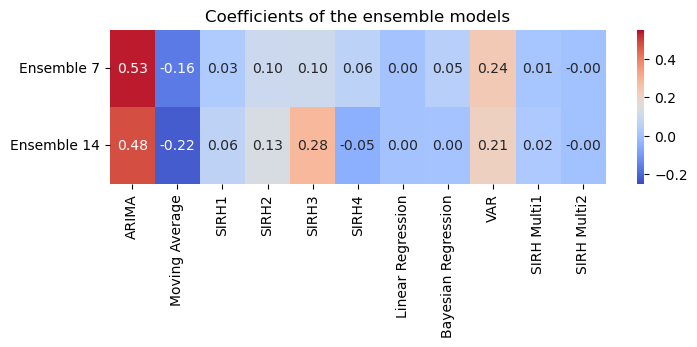

In [32]:
models=models1Dnames+models3Dnames
models.remove('Exponential')
models.remove('Exponential Multi')
models.remove('Moving Average Multi')

df=pd.DataFrame(columns=models)
df.loc['7']=coefs_7_days
df.loc['14']=coefs_14_days
plt.figure(figsize=(8, 2))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", vmin = -0.25, vmax=0.55)
# centrer  les couleurs en zéro : zero = blanc  :
plt.yticks(ticks = [0.5, 1.5], labels=['Ensemble 7', 'Ensemble 14'], rotation=0)
 

plt.title('Coefficients of the ensemble models')


In [42]:
def is_in_test_set_7(name): 
    for elt in names_test_7 : 
        if str(name.split('_')[-5] ) + '_' + str(name.split('_')[-4]) in elt : 
            return True
    return False 


def is_in_test_set_14(name):
    for elt in names_test_14 : 
        if str(name.split('_')[-5] ) + '_' + str(name.split('_')[-4]) in elt : 
            return True
    return False


Assessing performances of the ensemble models 

<>:52: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:52: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\grego\AppData\Local\Temp\ipykernel_15968\2467494401.py:52: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))
C:\Users\grego\AppData\Local\Temp\ipykernel_15968\2467494401.py:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))


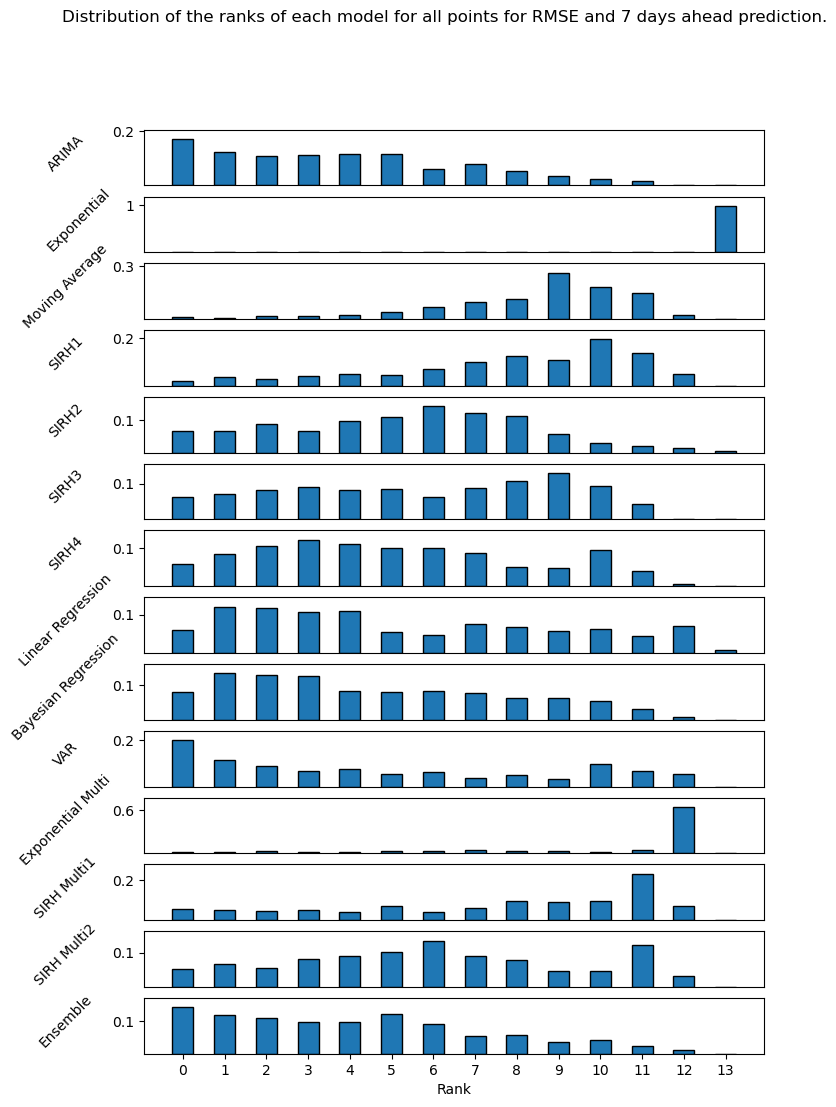

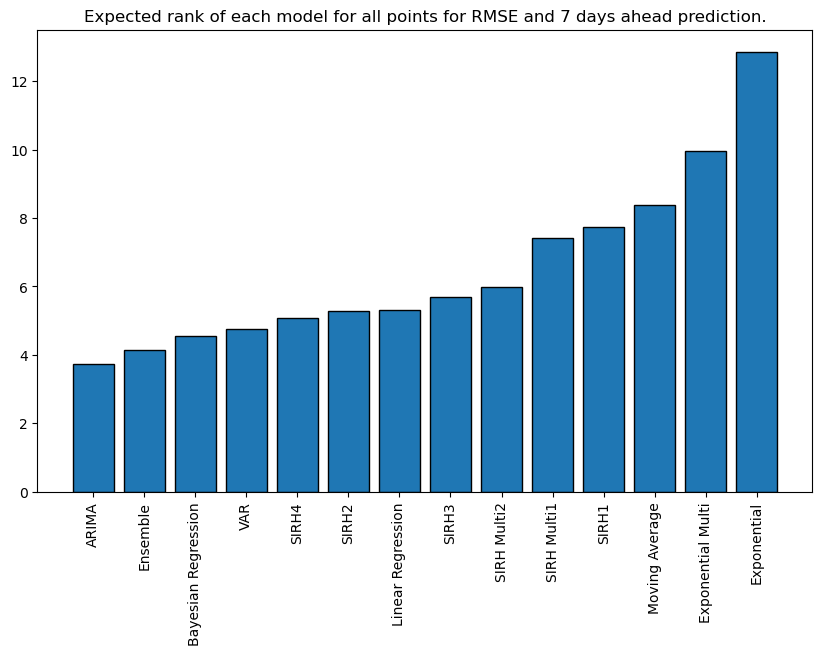

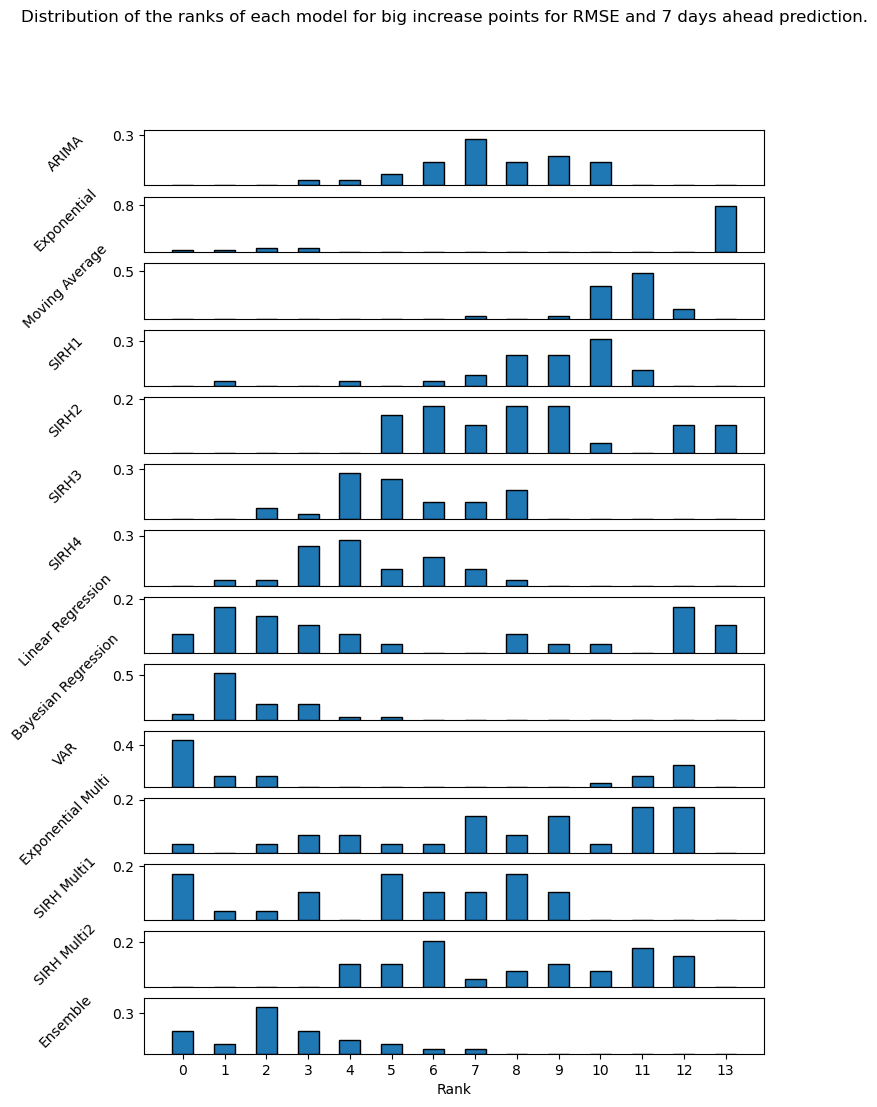

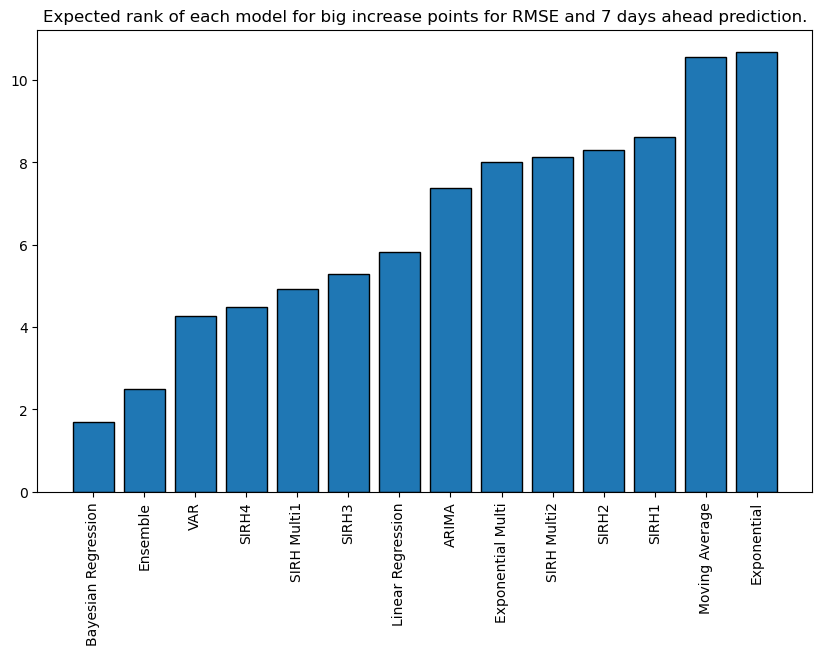

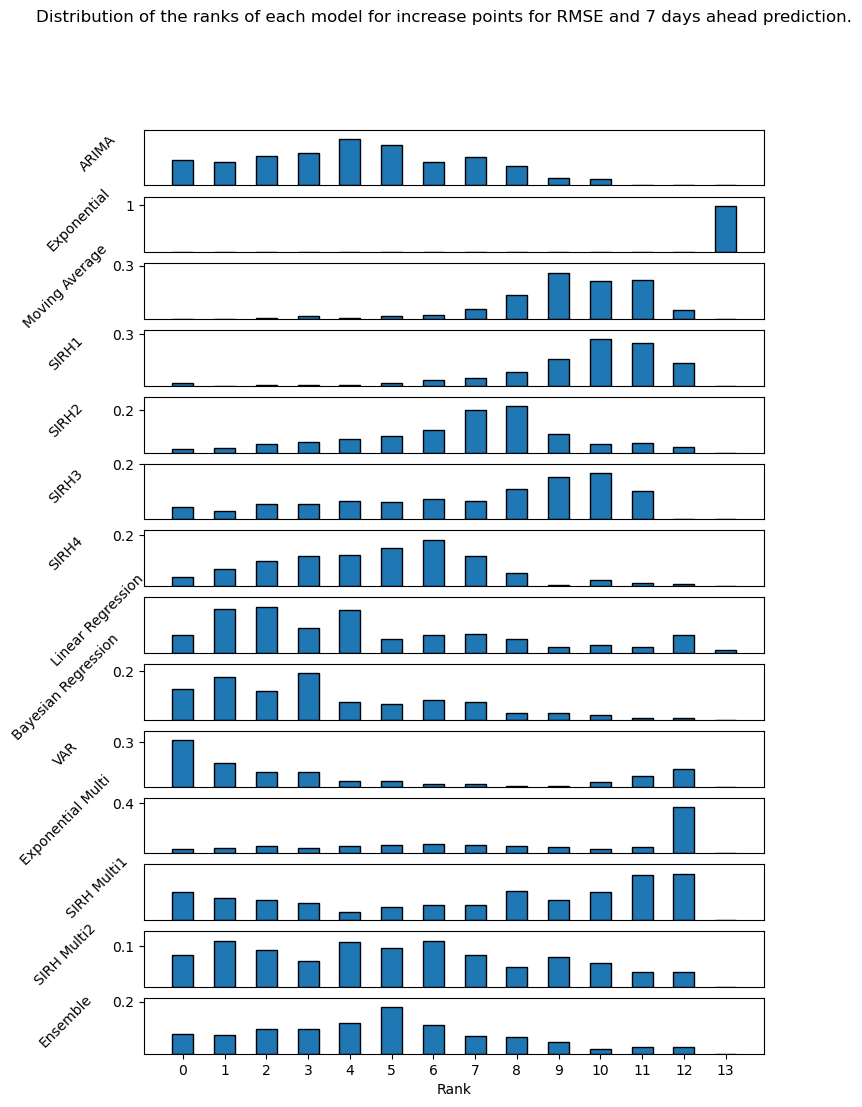

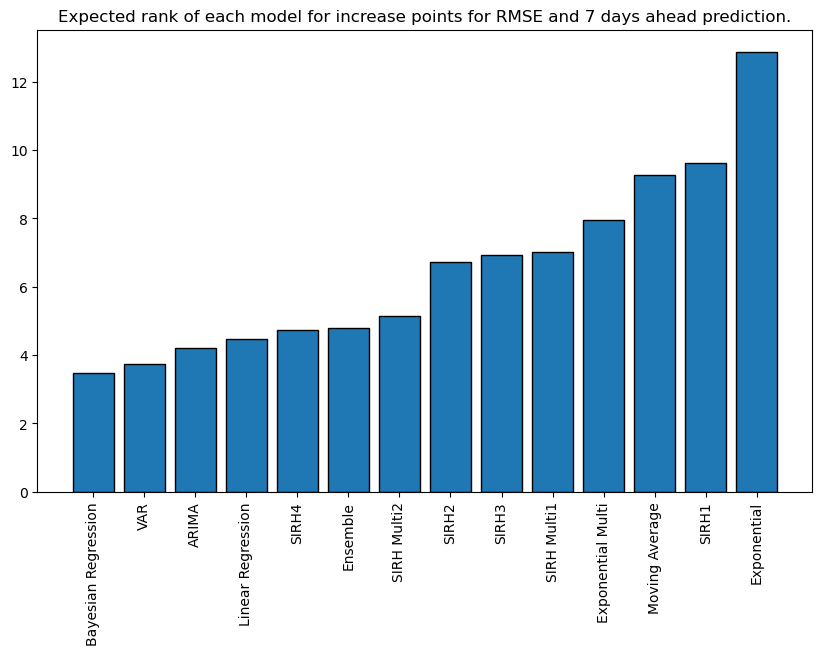

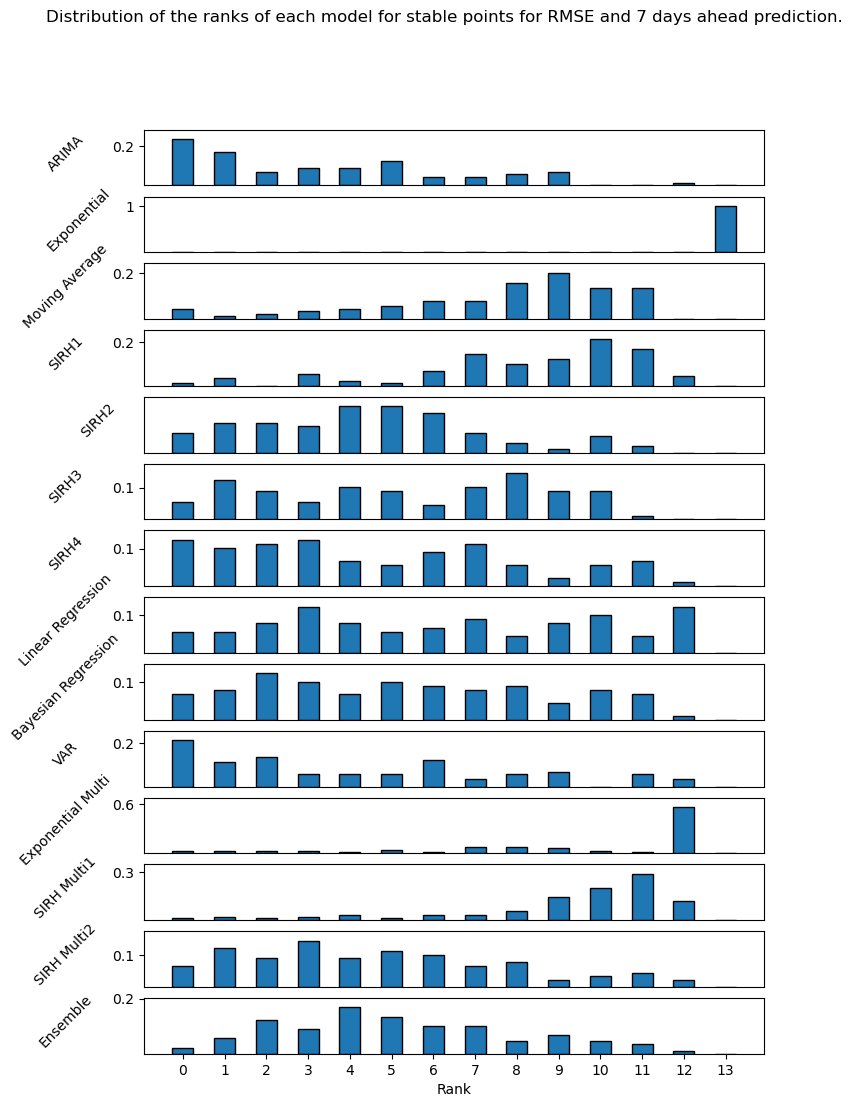

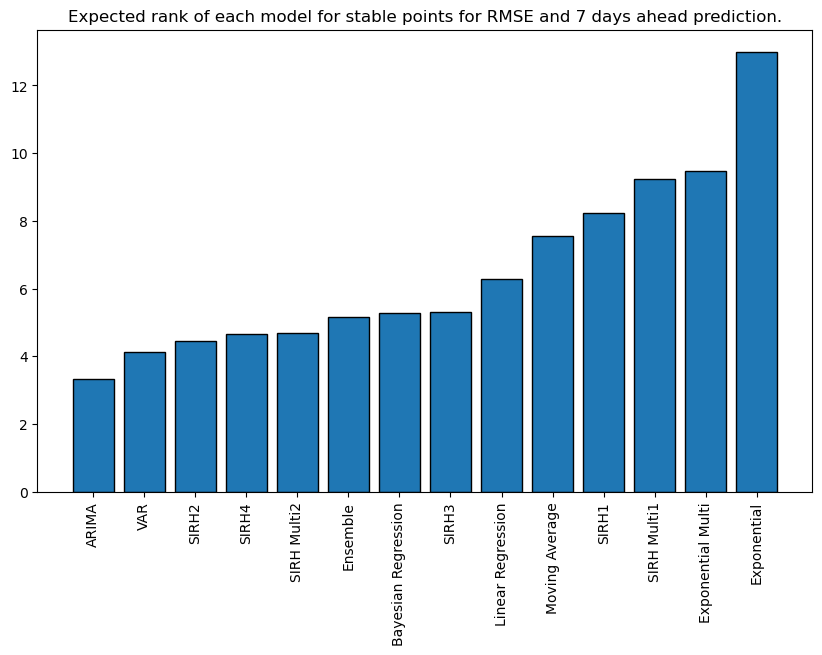

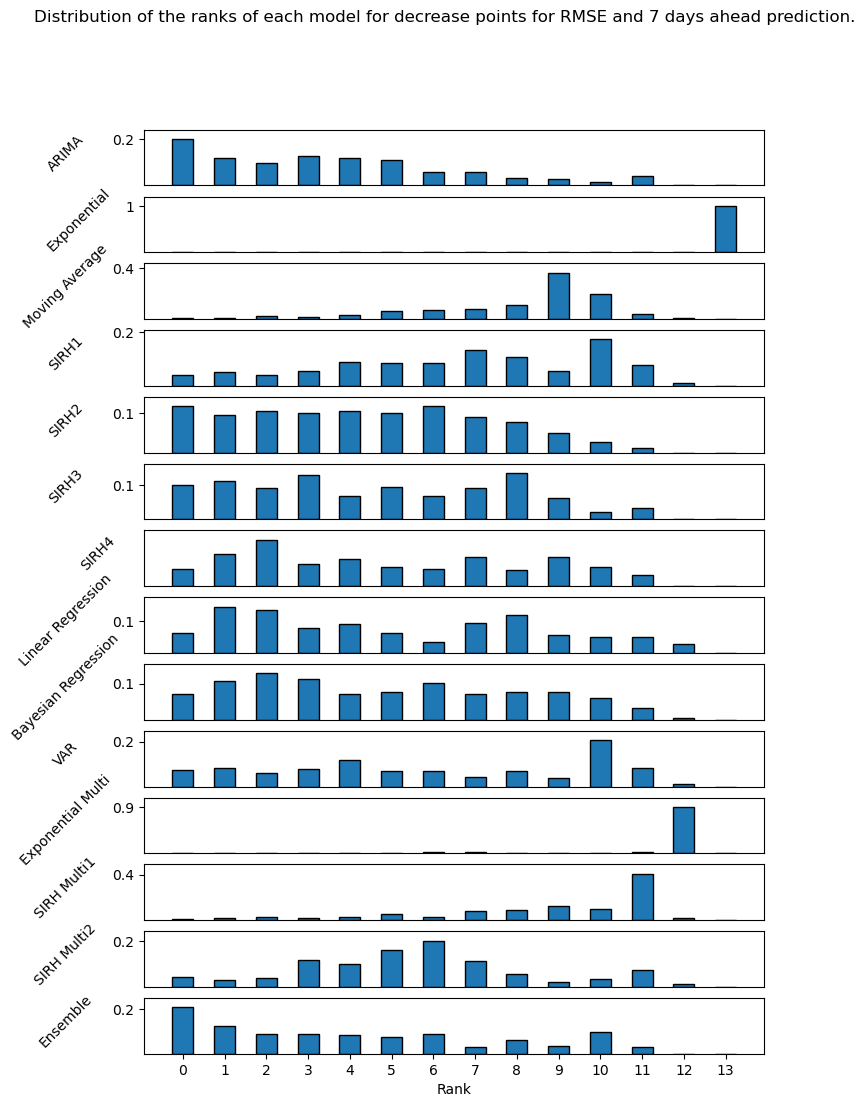

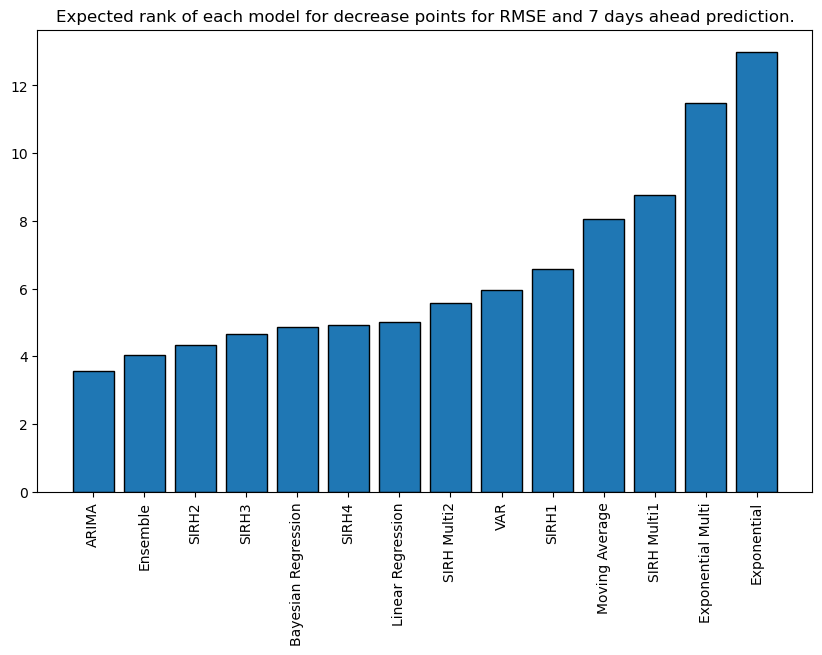

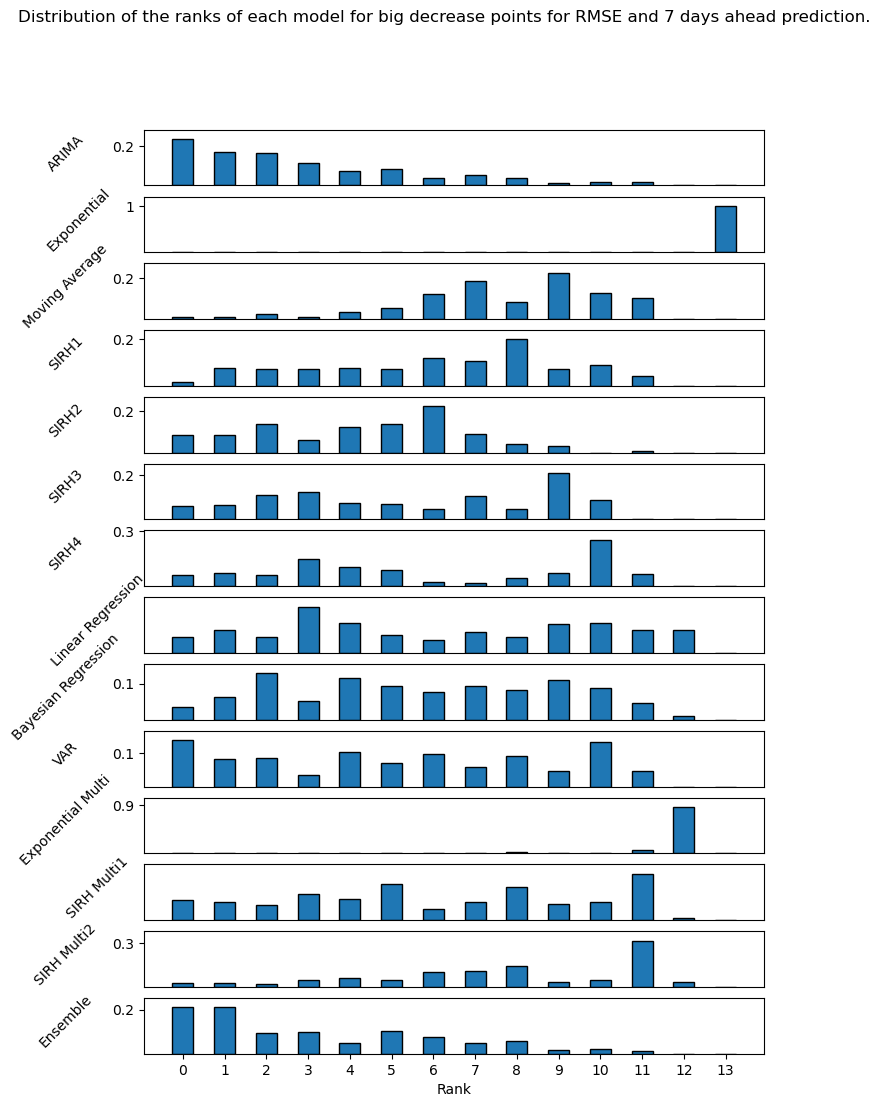

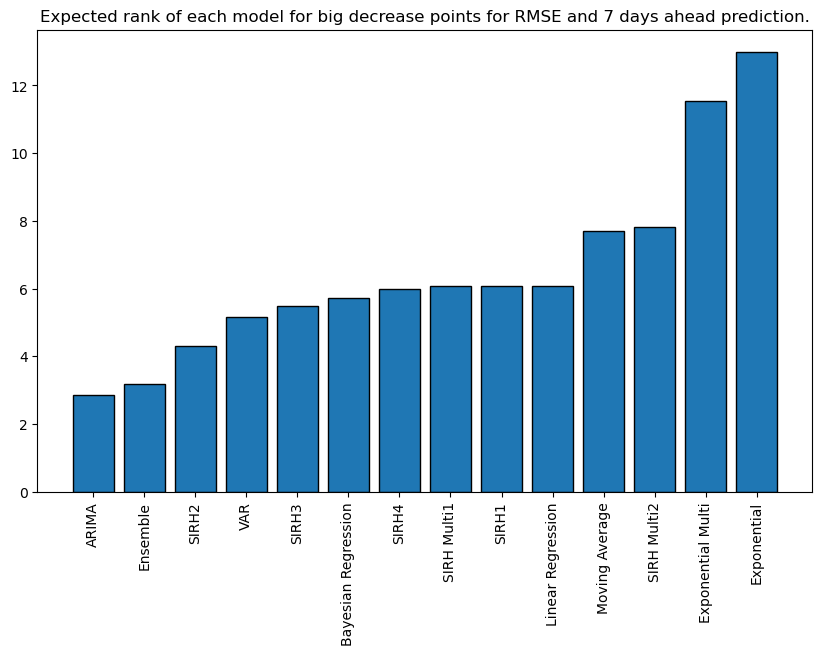

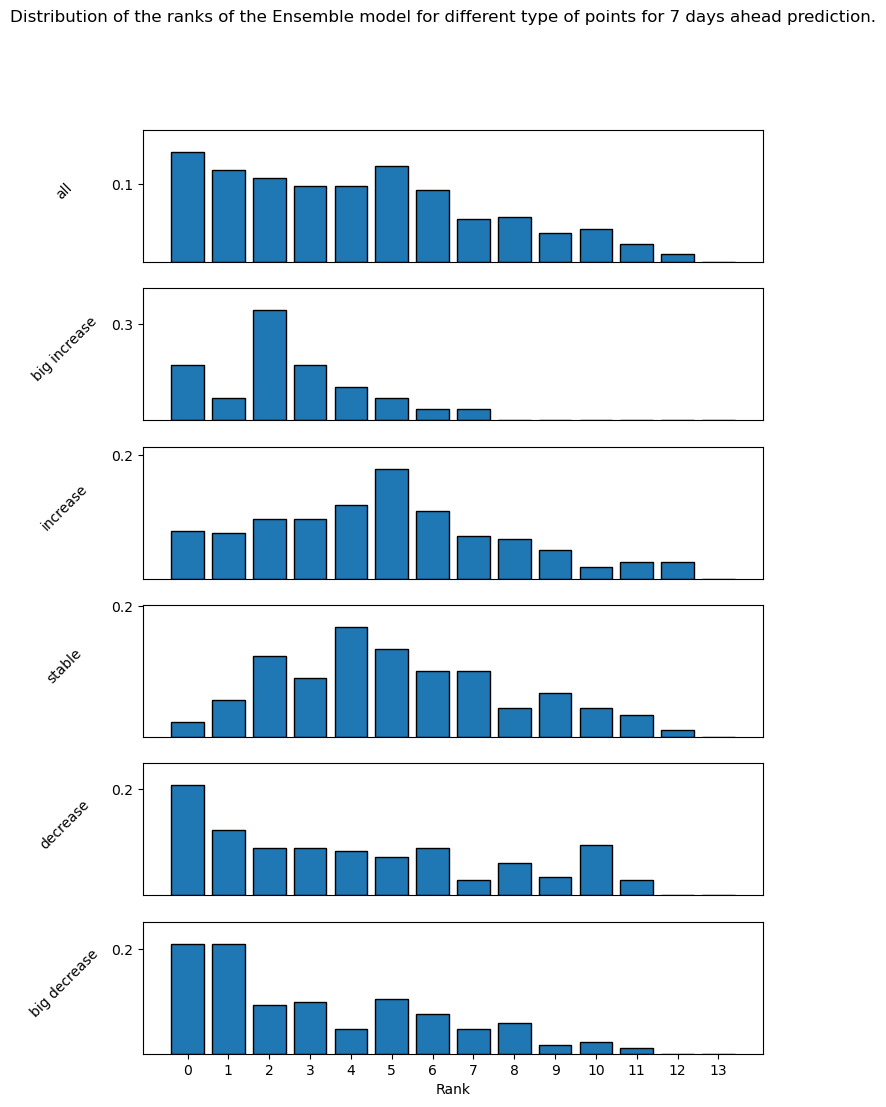

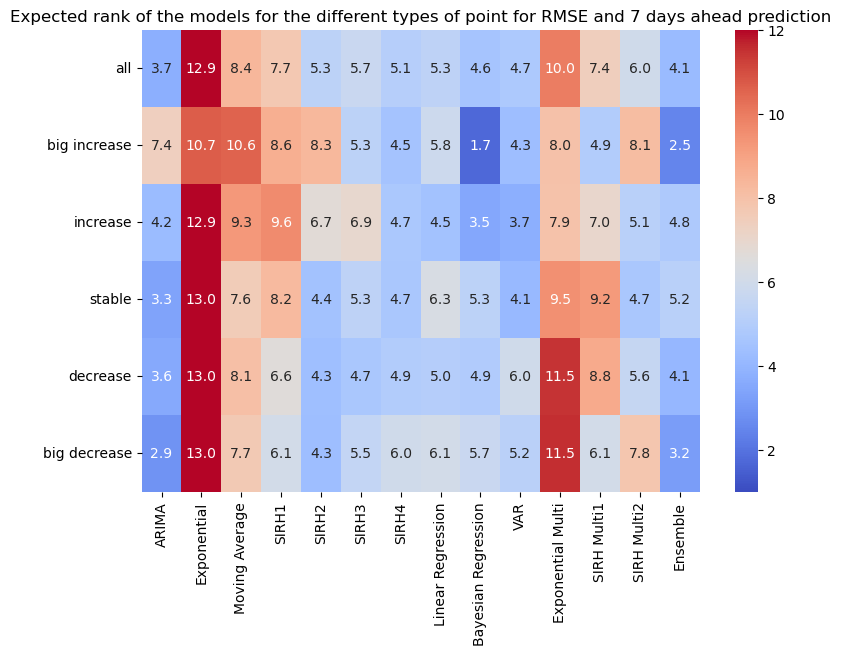

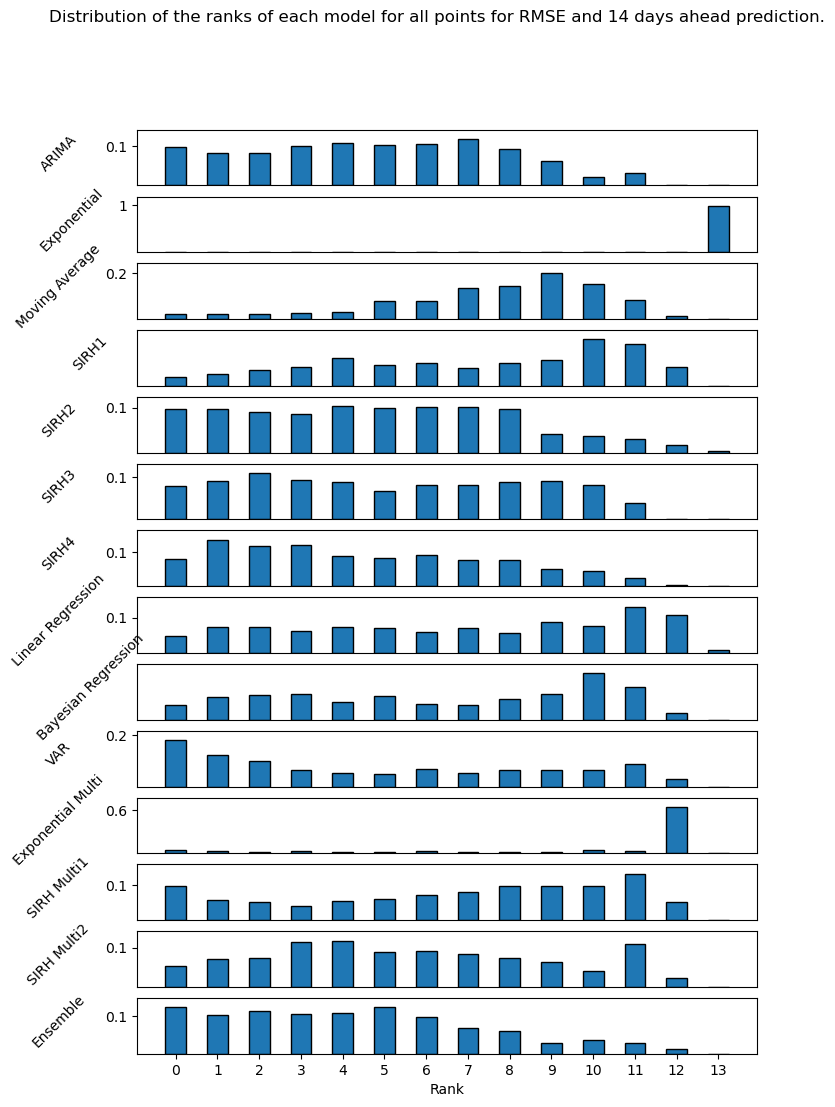

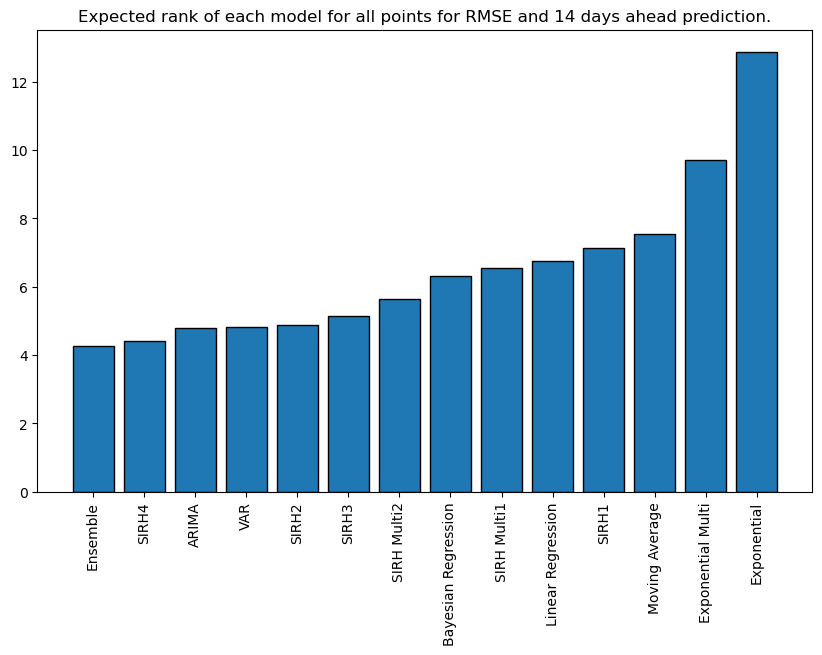

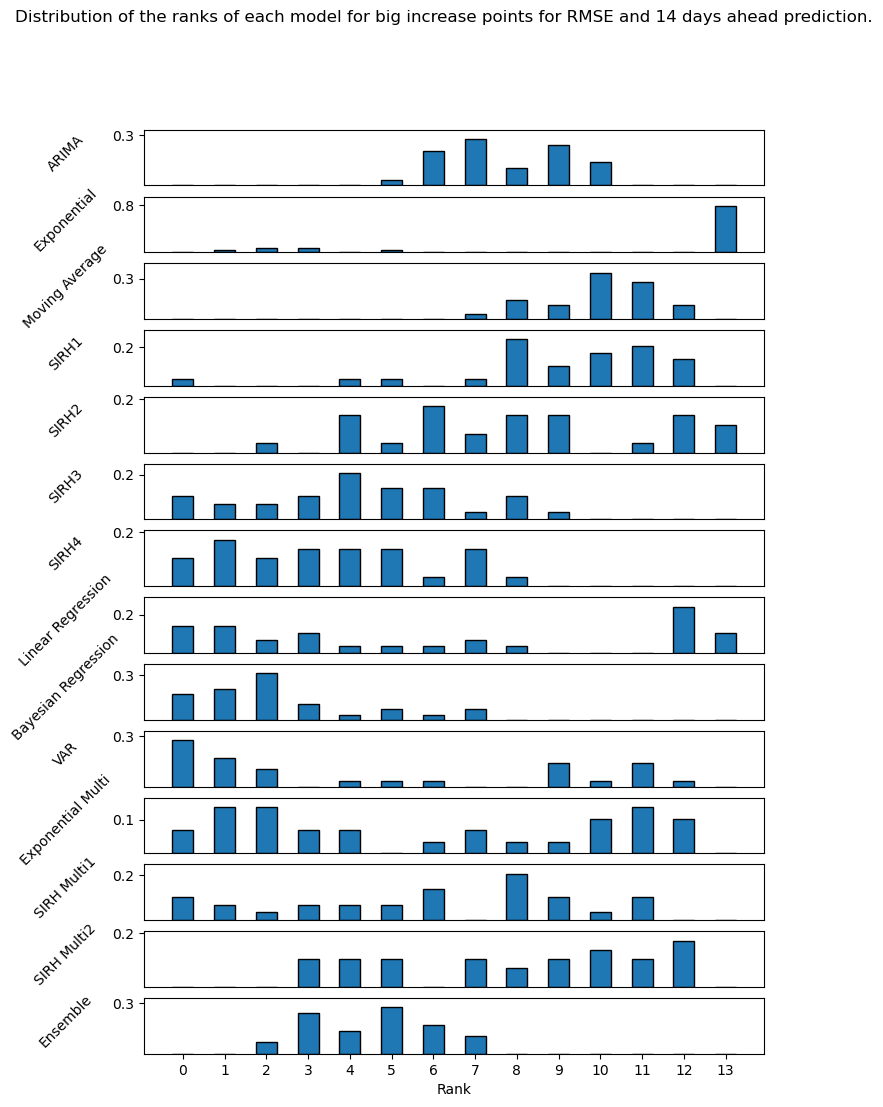

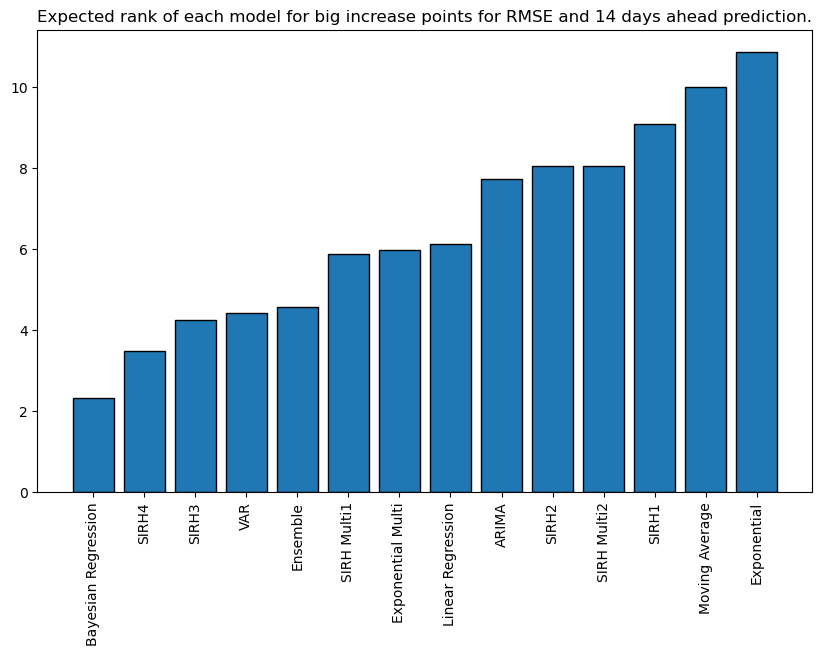

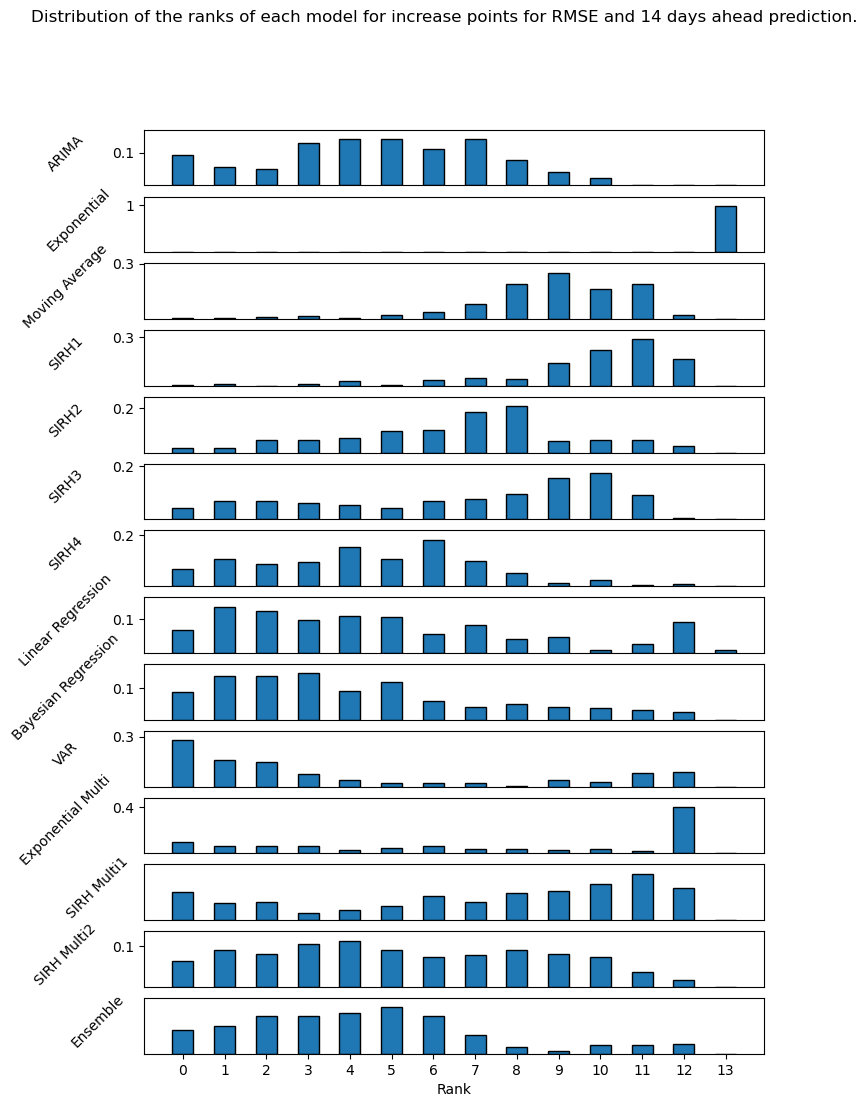

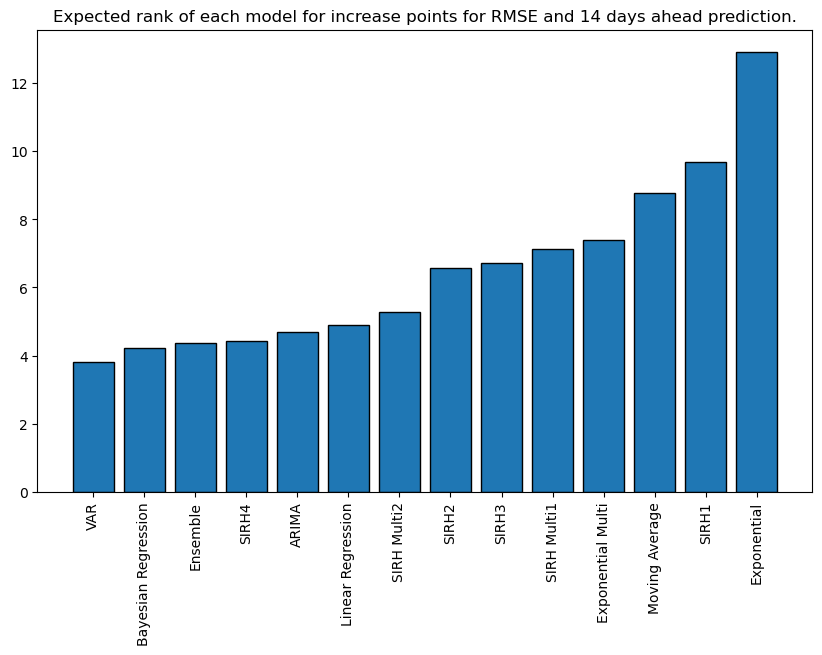

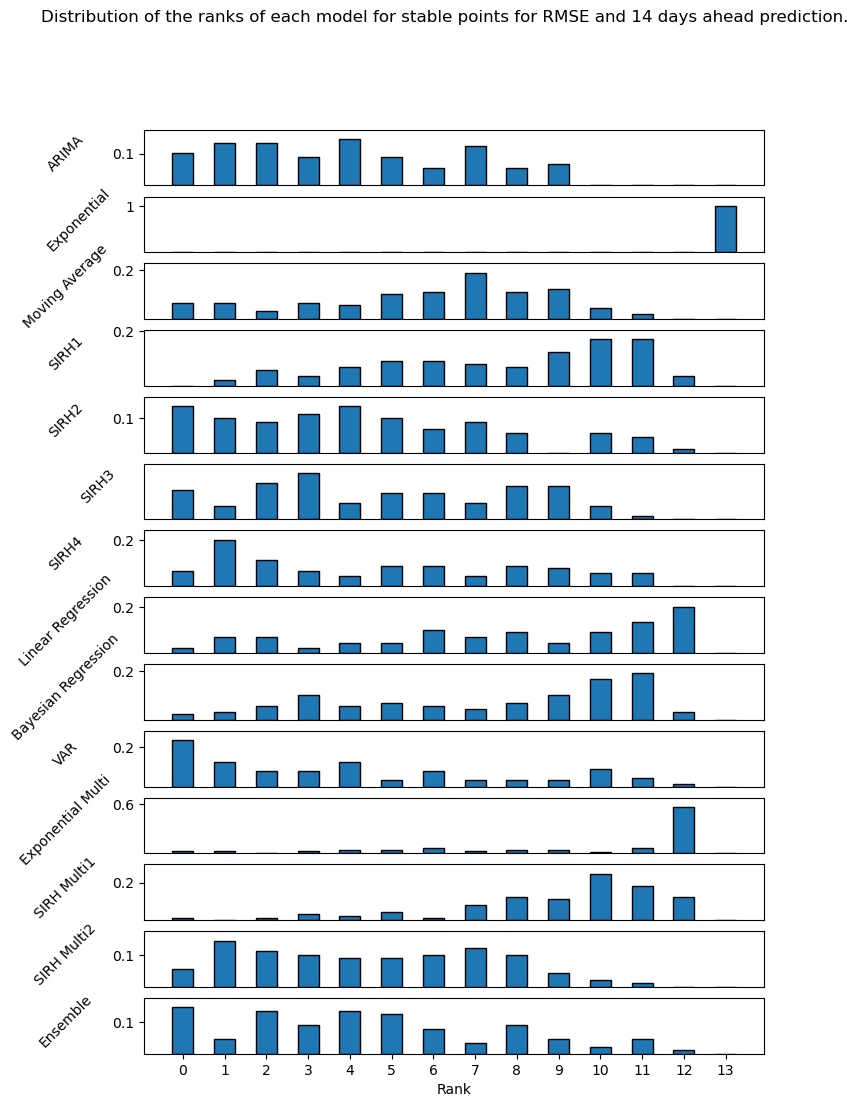

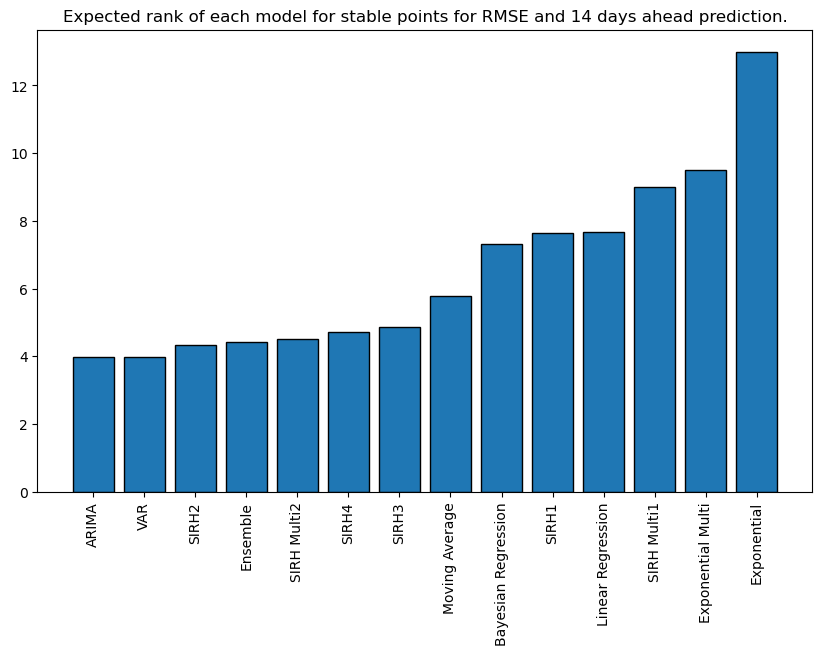

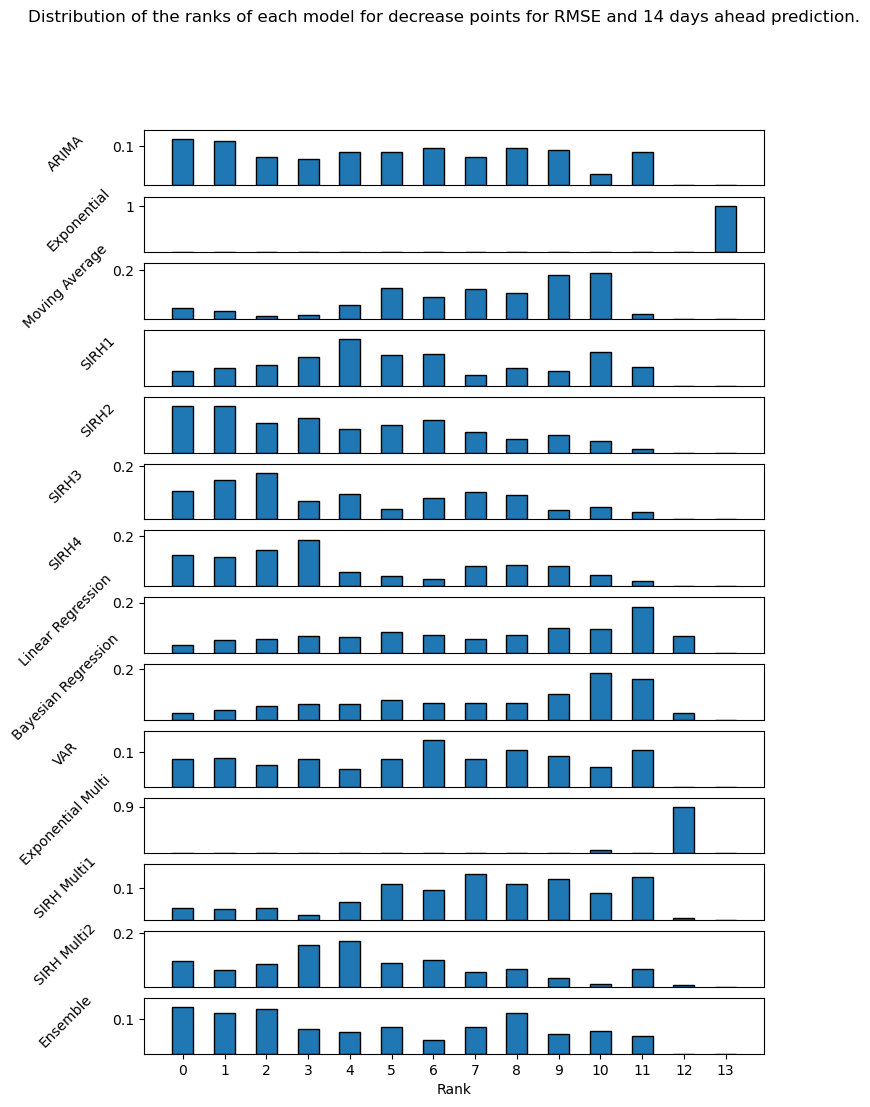

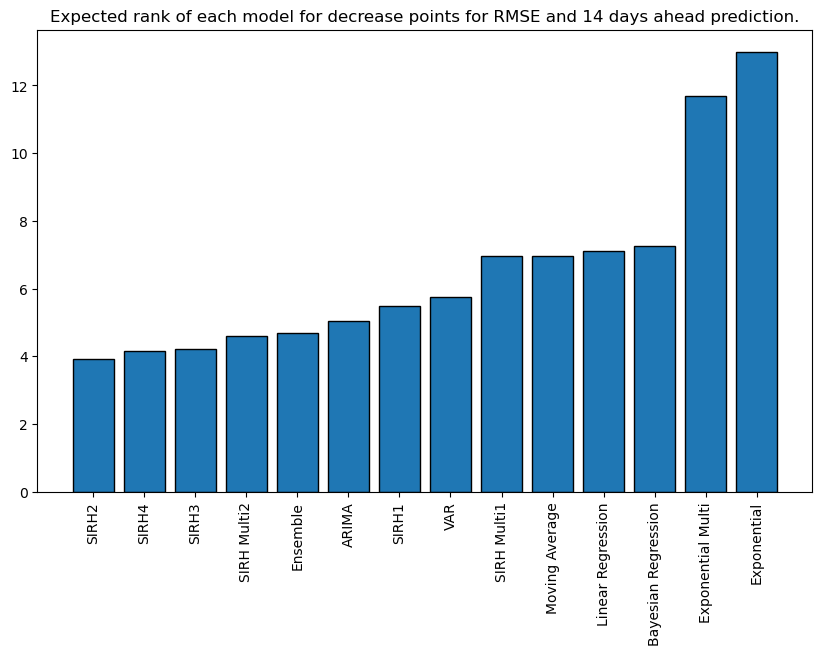

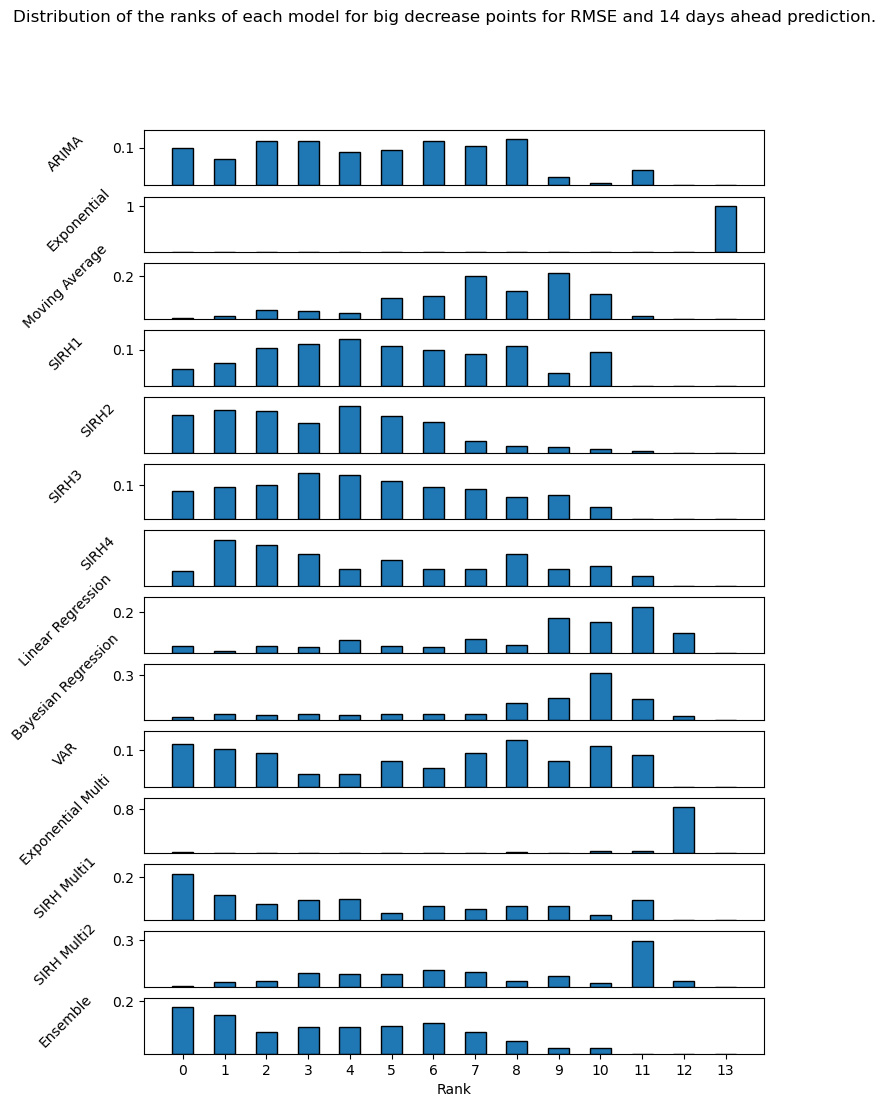

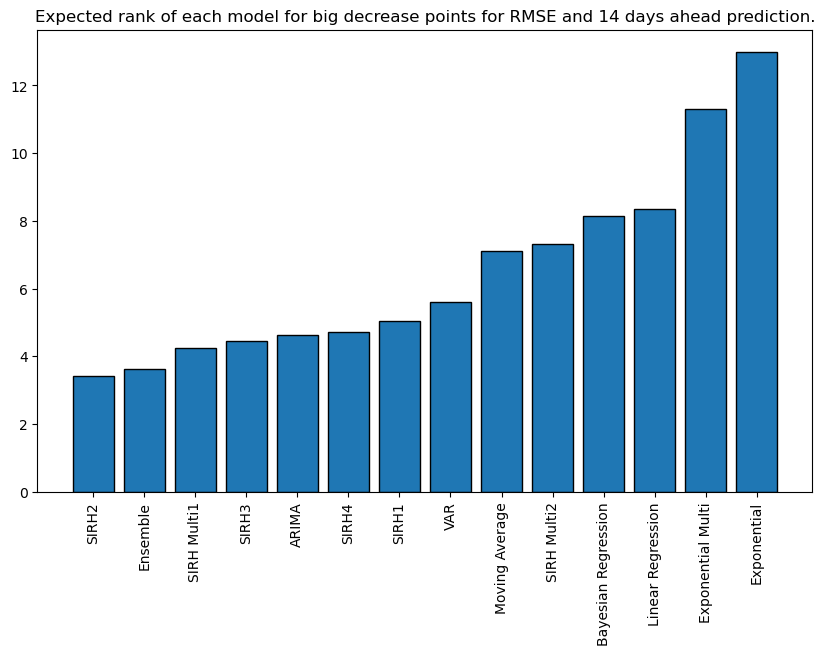

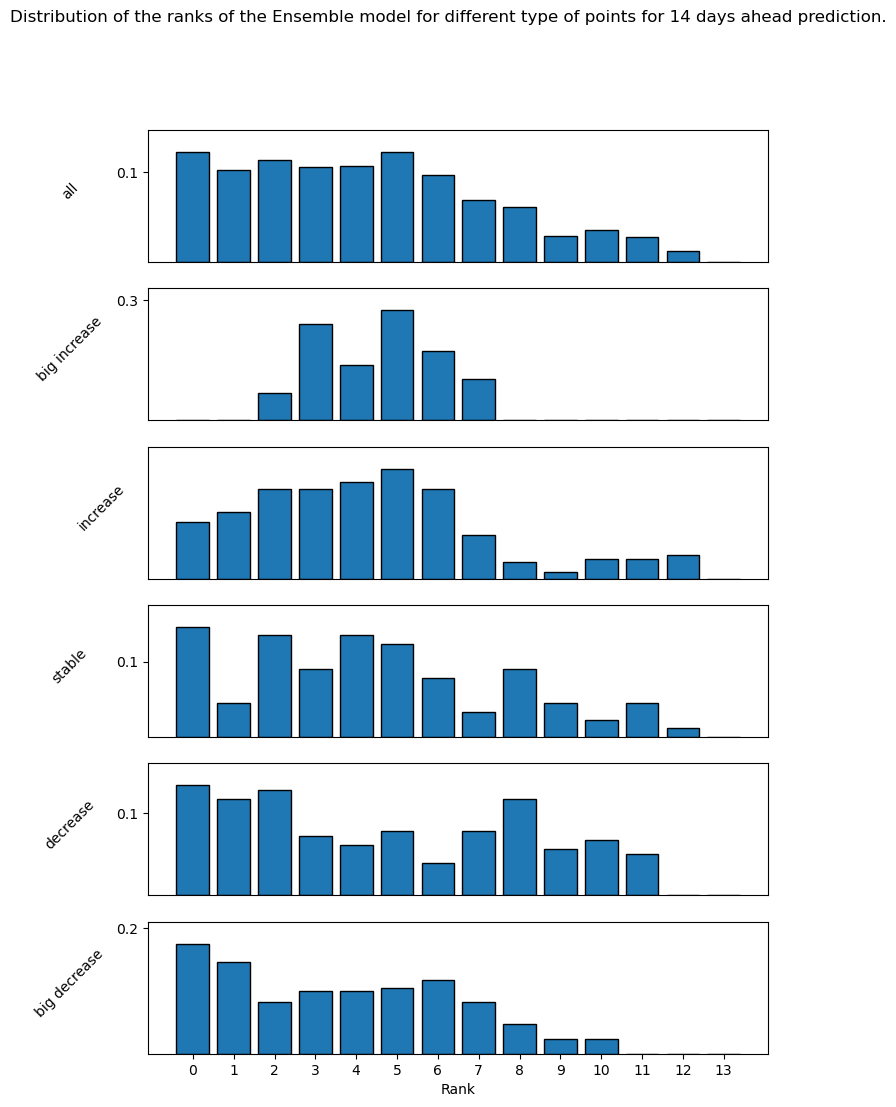

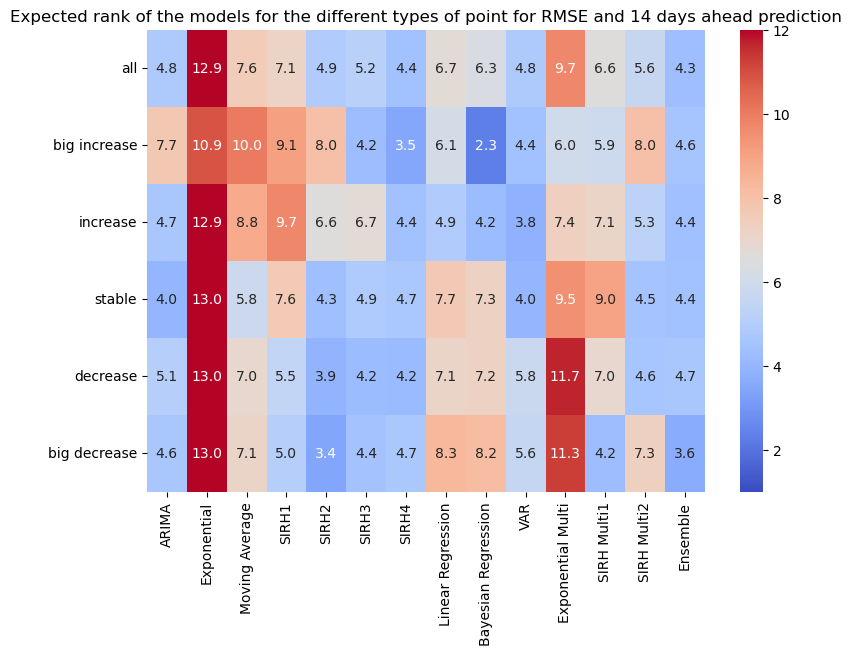

In [47]:
model_type='1D'
loss='RMSE'
reach='7'
list_of_models= models1Dnames+models3Dnames + ['Ensemble']
list_of_models.remove('Moving Average Multi')
# type_of_points=['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']
type_of_points=['all','big increase', 'increase' , 'stable', 'decrease', 'big decrease']
for loss in [ 'RMSE']: 
    
    for reach in ['7', '14']:
        if reach == '7':
            regressor=regressor_7_days
            is_in_test_set=is_in_test_set_7
        else :
            regressor=regressor_14_days
            is_in_test_set=is_in_test_set_14
        ranks_ensb=np.zeros((7,14))
        
        df_expected_ranks=pd.DataFrame(columns= list_of_models, index = type_of_points )
        for numeropoint, label_point in enumerate( type_of_points):
        # for label_point in ['all']:
            
            all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
            results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name and is_in_test_set(name)  ] # results of the models
            for name in results_list :
                mob=int(name.split('_')[-5])
                pand=int(name.split('_')[-4])
                dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                dicoresults=concat_dico(dicoresults1, dicoresults2)
                df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                df.drop(['Unnamed: 0'], axis=1, inplace=True)
                n_hospitalized = np.array(df.loc['n_hospitalized'])
                r_eff=np.array(df.loc['r_eff'])
                indexs_points=[[20*i] for i in range(1, 15) ] 
                prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                prediction.index=[20*i for i in range(1, 15)]
                prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi', 'Moving Average Multi'], axis=1)
                prediction_all=prediction
                prediction=prediction_bis
                for point in indexs_points: 
                    if n_hospitalized[point[0]] >= 100 :
                        if label_point=='all': 
                            ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), regressor.coef_) + regressor.intercept_
                            real_value=prediction_all['Real values'].loc[point[0]]
                            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            perfs.append(ensemble_perf)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        elif classify_bis(point[0], r_eff) == label_point :
                            ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), regressor.coef_) + regressor.intercept_
                            real_value=prediction_all['Real values'].loc[point[0]]
                            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            perfs.append(ensemble_perf)
                            
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
            

            ranks_ensb[numeropoint]=all_ranks[-1]
            fig, axs = plt.subplots(len(list_of_models), figsize=(8, 12))     
            expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]    
            for i in range(len(rankings)):   
                axs[i].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                axs[i].set_yticks([ round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
                axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                axs[i].set_ylabel(list_of_models[i], labelpad=30)
                axs[i].yaxis.label.set_rotation(45)
                if i != len(rankings)-1:
                    axs[i].set_xticks([])
                else : 
                    axs[i].set_xticks([j for j in range(len(rankings))])
                    axs[i].set_xlabel('Rank'  )
                fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')

            plt.show()
            plt.figure(figsize=(10, 6))
            exp_copy=expected_ranks.copy()
            expected_ranks.sort()
            df_expected_ranks.loc[label_point]=exp_copy
            plt.bar(sort_list(list_of_models, exp_copy), expected_ranks, edgecolor='black')
            plt.xticks(rotation=90)
            plt.title('Expected rank of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
        fig, ax = plt.subplots(len(type_of_points) , figsize=(8, 12))
        for i in range(len(type_of_points)): 
            ax[i].bar([j for j in range(14)], np.array(ranks_ensb[i])/(np.sum(np.array(ranks_ensb[i]))), edgecolor='black')
            ax[i].set_yticks([ round(np.max(ranks_ensb[i])/np.sum(ranks_ensb[i]), 1) ])
            ax[i].set_ylim(bottom = 0 , top = (np.max(ranks_ensb[i])/np.sum(ranks_ensb[i]))*1.2)
            ax[i].set_ylabel(type_of_points[i], labelpad=30)
            ax[i].yaxis.label.set_rotation(45)
            if i != len(type_of_points)-1:
                ax[i].set_xticks([])
            else : 
                ax[i].set_xticks([j for j in range(14)])
                ax[i].set_xlabel('Rank'  )
            fig.suptitle('Distribution of the ranks of the Ensemble model for different type of points for '+reach+' days ahead prediction.')
            
        plt.figure(figsize=(9,6))
        sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm', annot=True, fmt=".1f", vmin=1, vmax=12)
        xticks = list_of_models
        yticks =type_of_points
        plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
        plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks , rotation = 0 )
        plt.title('Expected rank of the models for the different types of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
        plt.show()
    